<a href="https://colab.research.google.com/github/hhhhhhhhhhhhhhhhho/AI/blob/master/Lab2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Colaboratory ?
#환경 맞출 필요 없고, 간편한 공유 때문에 사용하고 있다.

#Lab 2 : Linear Regression


##Theoretical Overview
  
    
  

<img src="https://miro.medium.com/max/2584/1*Nf2tTTkALYq6RTMQmhjo1A.png">  
    
<img src="https://t1.daumcdn.net/cfile/tistory/997F2F395BDD010026">




**1. H(x) : 주어진 x 값에 대해 에측을 어떻게 할 것인가 ?**  
**2. cost(W,b) : H(x) 가 y 를 얼마나 잘 예측하는가 ?**


#Pytorch 를 사용한다.  
##Torch 는 딥러닝/머신러닝 라이브러리.    
Python 을 이용하여 해결 할 수 있다.

In [2]:
import torch
import torch.optim as optim


In [3]:
#For reproducibility
torch.manual_seed(1)

In [4]:
#(x1,y1)=(1,1) , (x2,y2)=(2,2) , (x3,y3)=(3,3)
x_train = torch.FloatTensor(([1],[2],[3]))
y_train = torch.FloatTensor(([1],[2],[3]))

In [6]:
#x train 의 형태는 3 by 1 이다.
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [7]:
#y train 의 형태는  3 by 1 이다.
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


# Weight Initialization

In [8]:
W = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [10]:
b = torch.zeros(1, requires_grad=True)
print(b)
#학습용 변수.

tensor([0.], requires_grad=True)


#Hypothesis



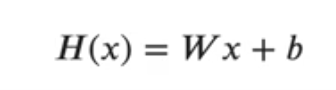

In [14]:
hypothesis = x_train * W + b
print(hypothesis)
#가설의 값 은 현재 0 임.

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


#Cost
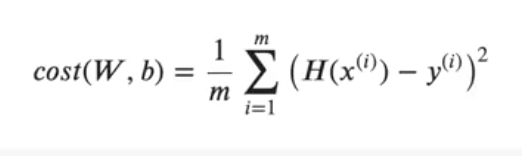

In [17]:
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [18]:
print(y_train)

tensor([[1.],
        [2.],
        [3.]])


In [19]:
print(hypothesis - y_train)

tensor([[-1.],
        [-2.],
        [-3.]], grad_fn=<SubBackward0>)


In [20]:
print((hypothesis - y_train)**2 )

tensor([[1.],
        [4.],
        [9.]], grad_fn=<PowBackward0>)


In [21]:
#평균값을 알아봤음.
cost = torch.mean((hypothesis - y_train)**2)
print(cost)

tensor(4.6667, grad_fn=<MeanBackward0>)


#Gradient Descent

In [23]:
# learning rate => lr = 0.01
# W : = w-alpha*d/dw*cost(w)
optimizer = optim.SGD([W,b], lr=0.01)

In [28]:
#옵티마이저 초기화
optimizer.zero_grad()

#cost 계산 => 미분값 계산
cost.backward()

#옵티마이저 갱신
optimizer.step()

In [30]:
print(W)
print(b)

tensor([0.0933], requires_grad=True)
tensor([0.0400], requires_grad=True)


위에서 W 와 b 는 각각 0 이었지만
W 가 갱신된 것을 볼 수 있다.

In [33]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.1333],
        [0.2267],
        [0.3200]], grad_fn=<AddBackward0>)


In [37]:
cost = torch.mean((hypothesis - y_train)**2)
print(cost)

#이렇게 cost 가 반복적으로 작아지고, cost 가 더 이상 작아지지 않을 때 까지 반복한다면 학습이 완료되것으로 생각할 수 있다.

tensor(3.6927, grad_fn=<MeanBackward0>)


#Traning with Full Code
## In reality , we will be traning on the dataset for multiple epochs. This can be done simply with loops
### 이 모델은 데이터 셋에서 학습될 수 있는데 , 간단히 루프를 돌면서 해결 할 수 있다.


In [43]:
#데이터
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[1],[2],[3]])

#모델 초기화
W = torch.zeros(1, requires_grad=True)  # True 중요함 !
b = torch.zeros(1, requires_grad=True)

#Optimizer 설정
optimizer = optim.SGD([W,b], lr = 0.01) 
#Gradient Descent 사용 할 건데, SGD 알고리즘을 이용해서 ! 그리고 그 알고리즘은 W 와 b 를 구해주면 된다!
#근데 Leaning Rate 는 0.01 이다.

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    #H(x) 계산
    hypothesis = x_train *W + b

    #cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)


    #cost 로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    #100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} cost : {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

    

Epoch    0/1000 W: 0.093, b: 0.040 cost : 4.666667
Epoch  100/1000 W: 0.873, b: 0.289 cost : 0.012043
Epoch  200/1000 W: 0.900, b: 0.227 cost : 0.007442
Epoch  300/1000 W: 0.921, b: 0.179 cost : 0.004598
Epoch  400/1000 W: 0.938, b: 0.140 cost : 0.002842
Epoch  500/1000 W: 0.951, b: 0.110 cost : 0.001756
Epoch  600/1000 W: 0.962, b: 0.087 cost : 0.001085
Epoch  700/1000 W: 0.970, b: 0.068 cost : 0.000670
Epoch  800/1000 W: 0.976, b: 0.054 cost : 0.000414
Epoch  900/1000 W: 0.981, b: 0.042 cost : 0.000256
Epoch 1000/1000 W: 0.985, b: 0.033 cost : 0.000158


결과를 보면 W 가 1 에 가까워지고 있는 것을 볼 수 있다.

In [ ]:
#Example.
#인공지능 수업을 7시간 공부했을 때 예측 시험 성적은 ?
#H(x) = Wx + b
#가설설정 => 예측하고자 하는 값 => 시험성적 => 1 * 7 + b ( 0.033)
#여기서 데이터는 시험성적고 관련 된 데이터가 아니기 때문에 , 다소 맞지 않는 정보가 나타 날 것이다.

#데이터의 유형 ?

#Example.
인공지능 수업을 7시간 공부했을 때 예측 시험 성적은 ?  
H(x) = Wx + b  
가설설정 => 예측하고자 하는 값 => 시험성적 => 1 * 7 + b ( 0.033)  
여기서 데이터는 시험성적고 관련 된 데이터가 아니기 때문에 , 다소 맞지 않는 정보가 나타 날 것이다.

##데이터의 유형 ?
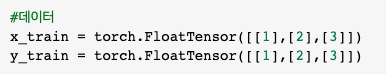